# Toy example - Meta gradients

## Meta gradients


0
11872.451171875
0.10515715181827545
1000
12072.12890625
0.004564056172966957
2000
12041.16796875
0.0025046919472515583
3000
12067.294921875
0.0021107420325279236
4000
12050.7578125
0.0009755687788128853
5000
12458.10546875
0.000699350144714117
6000
12029.6337890625
0.00034279341343790293
7000
12116.953125
0.0008327563991770148
8000
12399.5703125
0.00021525757620111108
9000
12249.431640625
5.535591481020674e-05
10000
12130.41796875
6.218639464350417e-05
11000
12299.9501953125
2.7902804504265077e-05
12000
12640.1259765625
0.0003898116701748222
13000
11823.65234375
1.8591186744743027e-05
14000
11825.8310546875
1.0170891982852481e-05
15000
12528.9951171875
5.254209827398881e-05
16000
12201.150390625
0.00017696614668238908
17000
12214.125
3.608945553423837e-05
18000
12236.6796875
8.695023279869929e-05
19000
12217.330078125
2.557748757681111e-06
20000
12207.0654296875
9.451272489968687e-05
21000
12344.294921875
0.00033841628464870155
22000
12351.8388671875
0.00020358913752716035
23000
1244

185000
11934.630859375
2.903784206864657e-06
186000
12017.1220703125
2.3461766431864817e-06
187000
12389.02734375
2.5891881705319975e-06
188000
11945.83203125
3.201125480245537e-07
189000
12084.6572265625
7.360323797911406e-05
190000
12088.1982421875
5.410092853708193e-07
191000
12154.41796875
0.0023931097239255905
192000
12162.484375
1.1750180419767275e-06
193000
12250.0771484375
2.1203577489359304e-06
194000
12109.2138671875
3.1978079277905636e-06
195000
12336.845703125
1.857983079389669e-05
196000
12114.28125
4.837630967813311e-06
197000
12219.234375
3.037913813841442e-07
198000
12186.267578125
4.305313883179451e-09
199000
12323.5283203125
0.0003374548105057329
200000
12394.15625
0.000152394495671615
201000
12248.728515625
0.002449990250170231
202000
12207.7158203125
8.484239515382797e-06
203000
12558.201171875
0.0002884072018787265
204000
12229.1630859375
1.7679719022112295e-08
205000
12208.470703125
6.291315003181808e-06
206000
12213.2421875
7.724147508270107e-06
207000
12062.6523

368000
12053.849609375
0.0005190143710933626
369000
12150.1953125
3.564625512808561e-05
370000
12161.28515625
0.0007242668652907014
371000
11962.521484375
2.3623748290901858e-08
372000
11993.701171875
0.003227017354220152
373000
12242.859375
7.0732457970734686e-06
374000
11985.96875
4.290377091820119e-06
375000
12006.3642578125
3.111869091299013e-07
376000
11900.365234375
0.00011072392226196826
377000
12145.248046875
2.4085818495223066e-07
378000
12033.5126953125
1.2982202406419674e-06
379000
12481.0009765625
8.00581119619892e-07
380000
12244.421875
0.0013521313667297363
381000
12224.6337890625
9.283590429731703e-08
382000
12147.0341796875
2.0049091276064246e-08
383000
11914.48046875
5.530663926833768e-09
384000
12222.3349609375
5.1687255364640805e-08
385000
12015.85546875
6.509744707727805e-06
386000
11868.0205078125
0.001038741203956306
387000
11778.02734375
0.00013084473903290927
388000
12168.4384765625
2.2982224123779815e-08
389000
11900.0283203125
0.00032151176128536463
390000
123

Text(0.5, 1.0, 'Meta Loss')

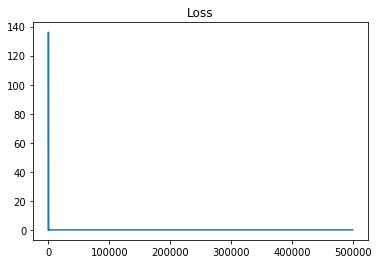

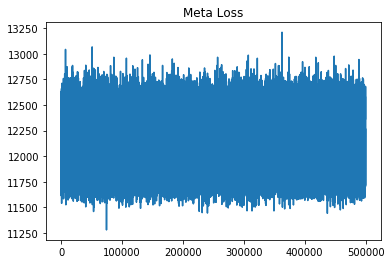

In [4]:
"""
when computing the loss, we will randomly add the term - meta_parameter * torch.rand(1)

The initial value for the meta_parameter is -100 but we make it a trainable parmeter.

The meta gradient should learn that in order to keep decreasing the loss function,
meta_parameter should be 0.0.3 
"""

# Imports
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


def get_targets(x):
    """Random function to learn."""
    return (10 + x ** 2).sum(axis=-1)

# Theta
model = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1))

# Eta
meta_model = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1))

#meta_parameter = torch.tensor(data=[-100], dtype=torch.float32, requires_grad=True)

criterion = nn.MSELoss(reduction='none')
meta_opt = optim.Adam(meta_model.parameters(), lr=5e-1)
opt  = optim.Adam(model.parameters(), lr=1e-4)
loss_data = []
meta_loss_data = []

for e in range(500000):
    
    # Get data
    x = torch.randn(32, 10)
    
    # Get Targets
    y = get_targets(x)
  
    # Predict targets with model - forward pass
    output = model(x)
    
    # Compute loss
    
    loss = criterion(output.squeeze(1), meta_model(x).squeeze(1)).mean()
    loss_data.append(loss.item())

    # Clearn grads from previous iteration in both optimizers
    opt.zero_grad()
    meta_opt.zero_grad()

    # Backward pass
    loss.backward()
    opt.step() # theta' = theta + f(weights)

    # Meta forward pass
    output = model(x) # y = model(theta', x)

    # Meta loss - which loss is correct here? should this one as only accounts for normal loss
    meta_loss = criterion(output.squeeze(1), y).mean()
    meta_loss_data.append(meta_loss.item())
    if e % 1000 == 0:
        print(e)
        print(meta_loss.item())
        print(loss.item())

    # Meta backward pass  
    meta_loss.backward()
    #if e % 1000 == 0:
    #    print([par.grad for par in meta_model.parameters()])
    meta_opt.step()
    #meta_paramater_data.append(meta_parameter.item())
  
# Plot loss
plt.figure()
plt.plot(loss_data)
plt.title("Loss")

plt.figure()
plt.plot(meta_loss_data)
plt.title("Meta Loss")